# Assignment 1

# Question 1 Model Selection

Mandana Samiei 
ID: 260779555

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
from numpy.linalg import inv
from numpy import genfromtxt
from math import exp
import random

%matplotlib inline  

def load_data(file_name):
    my_data = genfromtxt(file_name, delimiter=',')
    X = my_data[:,0]
    Y = my_data[:,1]
    return X,Y

# Question 1 

In [19]:
class LinearRegression(object):
    def __init__(self, X, Y, valid_x, valid_y, test_x, test_y):
        self.X = X
        self.Y = Y
        self.valid_x = valid_x
        self.valid_y = valid_y
        self.test_x = test_x
        self.test_y = test_y
    def get_poly(self, x, degree=20):
        features = np.zeros(shape=(x.shape[0],degree+1))
        for i in range(degree+1):
            features[:,i] = np.power(x,i)
        #print "Generated polynomial of degree {} with shape{}".format(degree, features.shape) 
        return features 
    def train_close(self):
        self.feat = self.get_poly(self.X)
        self.w = np.dot(np.dot(inv(np.dot(self.feat.T, self.feat)), self.feat.T), self.Y)
        print "Polynomial Parameters(W):\n{}".format(self.w)
    def visualize_fit(self, n_points=100):
        ax, fig = plt.subplots(0,figsize=(10,8))
        plt.scatter(self.X, self.Y, s=20, c="#1E8BC3", label="Training points")
        plt.scatter(self.valid_x, self.valid_y, s=20, c="g", label="Valid points")
        plt.scatter(self.test_x, self.test_y, s=20, c="y", label="Test points")
        x_min, x_max = self.X.min(),self.X.max()
        x_range = np.linspace(x_min, x_max, n_points)
        x_feat = self.get_poly(x_range)
        predicted_y = self.predict(x_feat)
        plt.plot(x_range, predicted_y, color="#F9690E", label="curve")
        legend = plt.legend(loc='upper right', shadow=True)
        plt.ylabel('Predictions')
        plt.xlabel('data points')
        plt.title('Train, Validatin and Test Data points and polynomical model')
        plt.show()
    def predict(self, X):
        y = np.dot(X, self.w)
        return y
    def compute_loss(self,degree=20):
        train_mse = ((np.dot(self.feat, self.w) - self.Y)**2).mean(axis=0)
        valid_mse = ((np.dot(self.get_poly(self.valid_x,degree), self.w) - self.valid_y)**2).mean(axis=0)
        test_mse = ((np.dot(self.get_poly(self.test_x,degree), self.w) - self.test_y)**2).mean(axis=0)
        print "Train MSE:{}, Valid MSE:{}, Test MSE:{}".format(train_mse, valid_mse, test_mse)

In [22]:
class RidgeReg(LinearRegression):
    def __init__(self, *args, **kwargs):
        super(RidgeReg, self).__init__(*args, **kwargs)
    def l2_regularization(self, lambda_=0.7):
        self.feat = self.get_poly(self.X)
        I = np.identity(self.feat.shape[1])
        self.w_ridge = np.dot(np.dot(inv((np.dot(self.feat.T, self.feat)+(lambda_*I))), self.feat.T), self.Y)
        print "Parameters W_ridge after L2 regularization corresponding to Lambda {} is: \n {} " .format(lambda_, self.w_ridge)
        return self.w_ridge;
    def compute_reg_loss(self,lambda_):
        train_mse = ((np.dot(self.get_poly(self.X), self.w_ridge) - self.Y)**2).mean(axis=0) + lambda_*(np.dot(self.w_ridge.T,self.w_ridge))
        valid_mse = ((np.dot(self.get_poly(self.valid_x), self.w_ridge) - self.valid_y)**2).mean(axis=0)+ lambda_*(np.dot(self.w_ridge.T,self.w_ridge))
        test_mse = ((np.dot(self.get_poly(self.test_x), self.w_ridge) - self.test_y)**2).mean(axis=0)+ lambda_*(np.dot(self.w_ridge.T,self.w_ridge))
        print "After Regularization with lambda {}:\n Train MSE:{}, Valid MSE:{}, Test MSE:{}".format(lambda_,train_mse, valid_mse, test_mse)
        return train_mse, valid_mse, test_mse
    def plot_reg_mse(self, n_points=10): #Plot the regularization MSE as well as finding the lmbda correspomd to minimum validation MSE
        train_mse = np.zeros(11)
        valid_mse = np.zeros(11)
        lambda_ = np.zeros(11)
        self.l2_regularization(0)
        min_valid_mse = self.compute_reg_loss(0)[1]
        ax, fig = plt.subplots(0,figsize=(10,8))
        for i in range(n_points+1):
            lambda_[i] = i*0.1
            self.l2_regularization(lambda_[i])
            train_mse[i], valid_mse[i],_ = self.compute_reg_loss(lambda_[i])
            if valid_mse[i] < min_valid_mse:
                min_valid_mse = valid_mse[i]
                self.optimum_lambda = lambda_[i]
        print "**Optimum lambda : {}".format(self.optimum_lambda) 
        print "***Minimum Validation Error is: {}" .format(min_valid_mse) 
        plt.plot(lambda_,train_mse,label='train_mse', linewidth=4.0)
        plt.plot(lambda_,valid_mse,label='valid_mse', linewidth=2.0)
        plt.ylabel('MSE')
        plt.xlabel('Lambda')
        leg = plt.legend(loc='best', shadow=True, fancybox=True)
        plt.title('Train and Validation MSE after regularization')
        plt.show() 
    def find_best_model(self):#Find the parameters of the best linear model of the minomum valid error
        self.w_ridge_best = self.l2_regularization(self.optimum_lambda)
    def visualize_best_model(self,n_points=100):
        ax, fig = plt.subplots(0,figsize=(10,8))
        plt.scatter(self.X, self.Y, s=20, c="#1E8BC3", label="Training points")
        plt.scatter(self.valid_x, self.valid_y, s=20, c="g", label="Valid points")
        plt.scatter(self.test_x, self.test_y, s=20, c="y", label="Test points")
        x_min, x_max = self.X.min(),self.X.max()
        x_range = np.linspace(x_min, x_max, n_points)
        x_feat = self.get_poly(x_range)
        predicted_y = np.dot(x_feat,self.w_ridge_best)
        plt.plot(x_range, predicted_y, color="#F9690E", label="curve")
        legend = plt.legend(loc='upper left', shadow=True)
        plt.ylabel('Predictions')
        plt.xlabel('data points')
        plt.title('Best linear model visualization with lambda = 0.1')
        plt.show()
    def test_performance(self):
        _,_, test_mse= self.compute_reg_loss(self.optimum_lambda)
        print "Test MSE of the best linear model with lambda = 0.1" .format(test_mse)


## main func

Polynomial Parameters(W):
[ -3.90941121e+00  -1.54809405e+01   1.55837132e+02   1.90995729e+03
  -7.74227221e+03  -3.57478317e+04   1.27144652e+05   2.90170194e+05
  -1.00155749e+06  -1.25476446e+06   4.38805271e+06   3.16203454e+06
  -1.14572060e+07  -4.78922630e+06   1.82417152e+07   4.28711259e+06
  -1.73639042e+07  -2.08485648e+06   9.07757576e+06   4.23245419e+05
  -2.00440032e+06]
[ -3.90941121e+00  -1.54809405e+01   1.55837132e+02   1.90995729e+03
  -7.74227221e+03  -3.57478317e+04   1.27144652e+05   2.90170194e+05
  -1.00155749e+06  -1.25476446e+06   4.38805271e+06   3.16203454e+06
  -1.14572060e+07  -4.78922630e+06   1.82417152e+07   4.28711259e+06
  -1.73639042e+07  -2.08485648e+06   9.07757576e+06   4.23245419e+05
  -2.00440032e+06]
Train MSE:6.47470396778, Valid MSE:1417.89812218, Test MSE:50.653704407


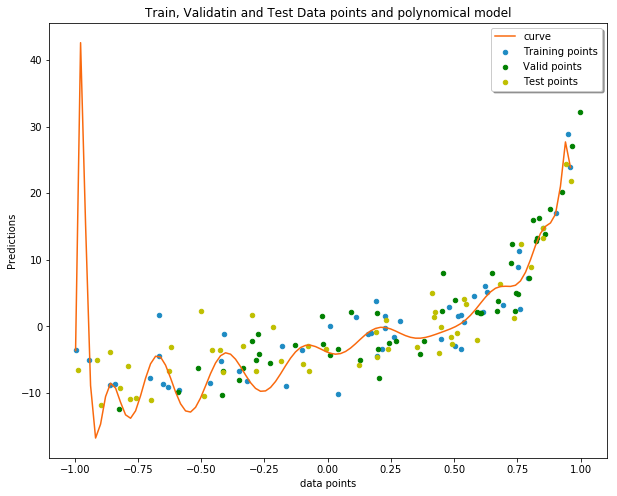

Parameters W_ridge after L2 regularization corresponding to Lambda 0 is: 
 [ -3.90941121e+00  -1.54809405e+01   1.55837132e+02   1.90995729e+03
  -7.74227221e+03  -3.57478317e+04   1.27144652e+05   2.90170194e+05
  -1.00155749e+06  -1.25476446e+06   4.38805271e+06   3.16203454e+06
  -1.14572060e+07  -4.78922630e+06   1.82417152e+07   4.28711259e+06
  -1.73639042e+07  -2.08485648e+06   9.07757576e+06   4.23245419e+05
  -2.00440032e+06] 
After Regularization with lambda 0:
 Train MSE:6.47470396778, Valid MSE:1417.89812218, Test MSE:50.653704407
Parameters W_ridge after L2 regularization corresponding to Lambda 0.0 is: 
 [ -3.90941121e+00  -1.54809405e+01   1.55837132e+02   1.90995729e+03
  -7.74227221e+03  -3.57478317e+04   1.27144652e+05   2.90170194e+05
  -1.00155749e+06  -1.25476446e+06   4.38805271e+06   3.16203454e+06
  -1.14572060e+07  -4.78922630e+06   1.82417152e+07   4.28711259e+06
  -1.73639042e+07  -2.08485648e+06   9.07757576e+06   4.23245419e+05
  -2.00440032e+06] 
After Reg

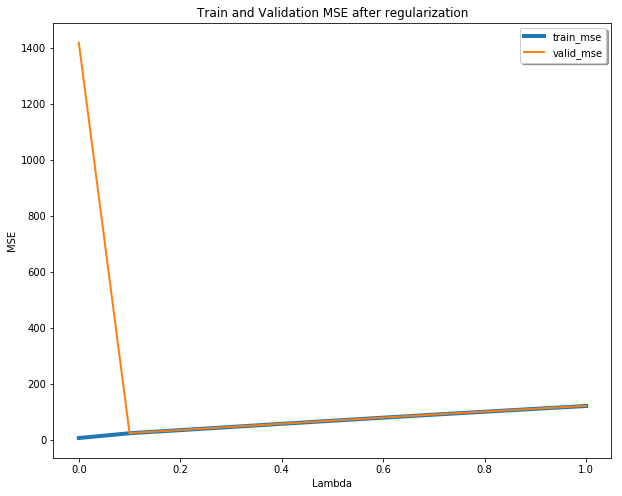

Parameters W_ridge after L2 regularization corresponding to Lambda 0.1 is: 
 [-3.17722099  6.78915972  1.44869651  0.63507815  3.89674456  3.81152353
  3.22537699  3.83416139  2.47201471  2.87579653  2.05306308  1.79979164
  1.80076147  0.86788514  1.5770957   0.14121617  1.32752458 -0.38872527
  1.04513597 -0.75304522  0.74134681] 


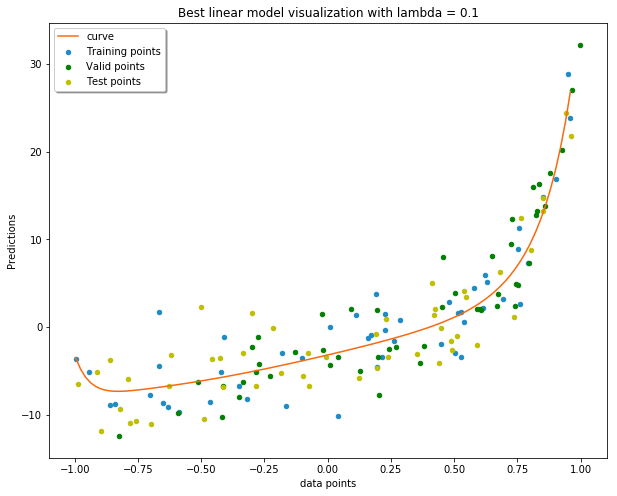

After Regularization with lambda 0.1:
 Train MSE:23.5938706187, Valid MSE:23.8882630174, Test MSE:25.143325645
Test MSE of the best linear model with lambda = 0.1


In [23]:
X,Y = load_data('hwk1_datasets/Datasets/Dataset_1_train.csv')
valid_X, valid_Y = load_data('hwk1_datasets/Datasets/Dataset_1_valid.csv')
test_X, test_Y = load_data('hwk1_datasets/Datasets/Dataset_1_test.csv')
model_1 = LinearRegression(X, Y, valid_X, valid_Y, test_X, test_Y)
model_1.get_poly(X,20)
model_1.train_close()
print model_1.w
model_1.compute_loss()
model_1.visualize_fit()

#Ridge Regression Model
model_2 = RidgeReg(X, Y, valid_X, valid_Y, test_X, test_Y)
model_2.plot_reg_mse()
model_2.find_best_model()
model_2.visualize_best_model()
model_2.test_performance()